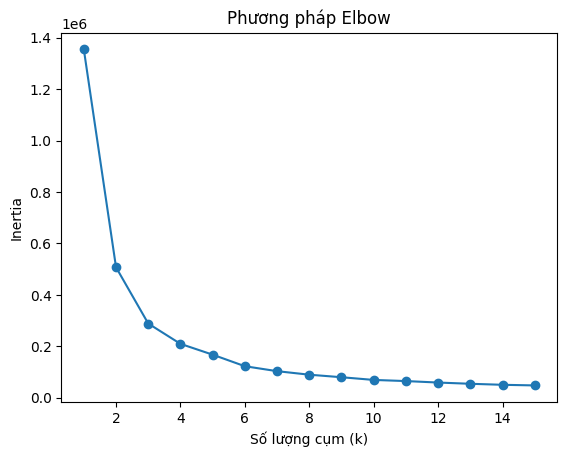

In [28]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

#B1 đọc dữ liệu

data = pd.read_csv(r"D:\KhaiPhaDulieuweb\WineQT_new.csv")
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
          'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

#B2 Thử chọn giá trị
k_values = range(1, 16)

#B3Tính toán inertia cho mỗi giá trị của k
inertias = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

#B4 Vẽ biểu đồ
plt.plot(k_values, inertias, marker='o') #o điểm đánh dấu hình tròn
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('Inertia')
plt.title('Phương pháp Elbow')
plt.show()

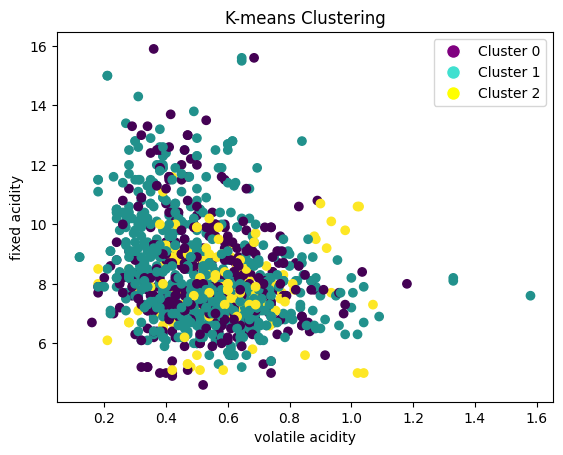

Cluster 0 random samples:
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
860            7.9              0.57         0.31             2.0      0.079   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
860                 10.0                  79.0  0.99677  3.29       0.69   

     alcohol  
860      9.5  
Cluster 1 random samples:
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
254           12.6              0.38         0.66             2.6      0.088   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
254                 10.0                  41.0    1.001  3.17       0.68   

     alcohol  
254      9.8  
Cluster 2 random samples:
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
943            7.4               0.6         0.26             2.1      0.083   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates 

In [64]:

#B5: Thực hiện phân cụm K-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

#B6: Hiển thị kết quả
# Các điểm dữ liệu được gán vào từng cụm
labels = kmeans.labels_
colors = ['purple' if label == 0 else 'turquoise' if label == 1 else 'yellow' for label in labels]
# Tạo chú thích cho các nhóm
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Cluster 0', markerfacecolor='purple', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='Cluster 1', markerfacecolor='turquoise', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='Cluster 2', markerfacecolor='yellow', markersize=10)])

# Hiển thị kết quả phân cụm trên biểu đồ
plt.scatter( data['volatile acidity'] ,data['fixed acidity'] ,c=labels, cmap='viridis')
plt.ylabel('fixed acidity')
plt.xlabel('volatile acidity')
plt.title('K-means Clustering')
plt.show()
for i in range(3):
    cluster_data = data[labels == i]
    # Chọn 3 mẫu ngẫu nhiên từ cụm
    random_samples = cluster_data.sample(n=1, random_state=42)
    # In ra số liệu của các mẫu ngẫu nhiên
    print(f"Cluster {i} random samples:")
    print(random_samples)
  

In [ ]:
import pandas as pd

# Đọc dữ liệu từ file CSV
df = pd.read_csv(r"D:\KhaiPhaDulieuweb\WineQT.csv")


# Loại bỏ các thuộc tính không mong muốn
columns_to_drop = ['quality', 'Id']  

df = df.drop(columns=columns_to_drop)

# Lưu DataFrame đã chỉnh sửa vào file CSV mới
df.to_csv('WineQT_new.csv', index=False)